# Food Classification using VGG16 

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model


In [10]:
train_dir = 'D:\data science\Data scientist\Projects\Project 6 Food class\Fast Food Classification V2\Train'
validation_dir = 'D:\data science\Data scientist\Projects\Project 6 Food class\Fast Food Classification V2\Valid'


## Data Augmentation

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Data preprocessing for validation (only rescaling, no augmentation)
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 15000 images belonging to 10 classes.
Found 3500 images belonging to 10 classes.


## Building the model

In [12]:
base_model = VGG16(weights='imagenet', include_top=False)

# Add new classifier layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Combine base model and new layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False


58889256/58889256 [==============================] - 9s 0us/step


## Training the model

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/20
109/469 [=====>........................] - ETA: 2:11 - loss: 0.8669 - accuracy: 0.7176

C:\Users\deepchanddc2\.conda\envs\py310\lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


469/469 [==============================] - 202s 429ms/step - loss: 0.8493 - accuracy: 0.7234 - val_loss: 1.0489 - val_accuracy: 0.6706
Epoch 2/20
469/469 [==============================] - 214s 455ms/step - loss: 0.8258 - accuracy: 0.7307 - val_loss: 1.0261 - val_accuracy: 0.6846
Epoch 3/20
469/469 [==============================] - 220s 469ms/step - loss: 0.8169 - accuracy: 0.7326 - val_loss: 1.0377 - val_accuracy: 0.6797
Epoch 4/20
469/469 [==============================] - 217s 462ms/step - loss: 0.8028 - accuracy: 0.7325 - val_loss: 1.0549 - val_accuracy: 0.6757
Epoch 5/20
469/469 [==============================] - 221s 472ms/step - loss: 0.7800 - accuracy: 0.7445 - val_loss: 1.0223 - val_accuracy: 0.6826
Epoch 6/20
469/469 [==============================] - 224s 478ms/step - loss: 0.7698 - accuracy: 0.7462 - val_loss: 1.0300 - val_accuracy: 0.6929
Epoch 7/20
469/469 [==============================] - 219s 467ms/step - loss: 0.7626 - accuracy: 0.7477 - val_loss: 1.0125 - val_accura

## Sav

In [25]:
model.save(r'D:\data science\Data scientist\Projects\Project 6 Food class\food_classifier_model.h5')

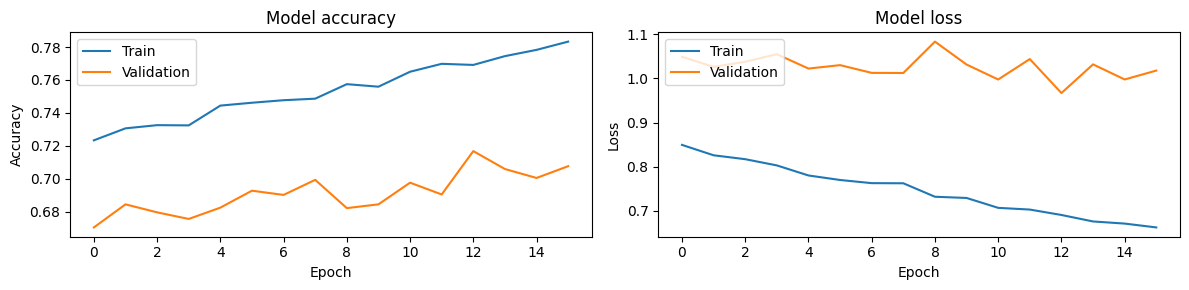

In [31]:
plt.figure(figsize=(12, 3))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


110/110 [==============================] - 25s 229ms/step


<Figure size 1000x800 with 0 Axes>

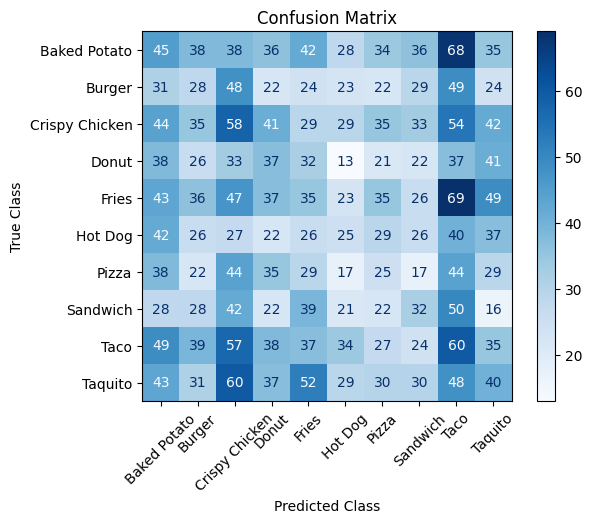

                precision    recall  f1-score   support

  Baked Potato       0.11      0.11      0.11       400
        Burger       0.09      0.09      0.09       300
Crispy Chicken       0.13      0.14      0.14       400
         Donut       0.11      0.12      0.12       300
         Fries       0.10      0.09      0.09       400
       Hot Dog       0.10      0.08      0.09       300
         Pizza       0.09      0.08      0.09       300
      Sandwich       0.12      0.11      0.11       300
          Taco       0.12      0.15      0.13       400
       Taquito       0.11      0.10      0.11       400

      accuracy                           0.11      3500
     macro avg       0.11      0.11      0.11      3500
  weighted avg       0.11      0.11      0.11      3500



In [27]:
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
true_labels = validation_generator.classes

# Plot confusion matrix
cm = confusion_matrix(true_labels, y_pred)
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks(rotation=45)
plt.show()

# Print classification report
print(classification_report(true_labels, y_pred, target_names=validation_generator.class_indices.keys()))

1/1 [==============================] - 0s 118ms/step


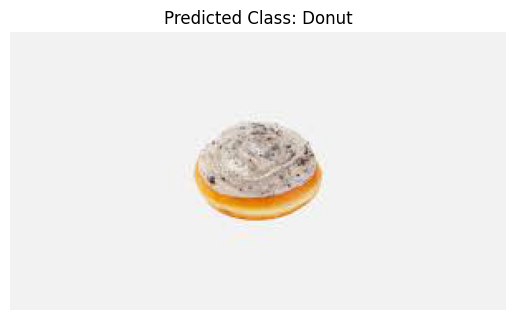

Predicted class: Donut
Probabilities: [0.01528531 0.14946644 0.1648008  0.32641947 0.05095739 0.05446512
 0.04122512 0.0865146  0.08327381 0.0275919 ]


In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array / 255.0  # Normalize pixel values to [0, 1]

def predict_class_and_display(image_path, model):
    # Preprocess the image
    processed_image = preprocess_image(image_path)
    
    # Predict class probabilities
    probabilities = model.predict(processed_image)
    
    # Get the class label with highest probability
    class_index = np.argmax(probabilities[0])
    
    # Map class index to class label
    labels = ['Baked potato', 'Burger', 'Crispy Chicken', 'Donut', 'Fries', 'Hot Dog', 'Pizza', 'Sandwich', 'Taco', 'Taquito']
    predicted_class = labels[class_index]
    
    # Display the image
    img = image.load_img(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Predicted Class: ' + predicted_class)
    plt.show()
    
    return predicted_class, probabilities[0]

# Load the saved model
model_path = r'D:\data science\Data scientist\Projects\Project 6 Food class\food_classifier_model.h5'
model = tf.keras.models.load_model(model_path)

# Example usage:
image_path = r'D:\data science\Data scientist\Projects\Project 6 Food class\Fast Food Classification V2\Test\Donut\Donut-Test (19).jpeg'
predicted_class, probabilities = predict_class_and_display(image_path, model)
print("Predicted class:", predicted_class)
print("Probabilities:", probabilities)
